In [1]:
import noaa_datasets
import pandas as pd

In [2]:
# load the stations dataset
stations_dataset = noaa_datasets.Stations()

Success!


In [3]:
# then load the inventory dataset
inventory_dataset = noaa_datasets.Inventory(stations_dataset)

Success!


In [4]:
# say we want to look at stations in Chicago 
# with at least 80 years of Max Temperature data

# first find stations which Chicago in the name
chicago_stations = inventory_dataset.df[ inventory_dataset.df['StationName'].str.contains('CHICAGO') ]
chicago_stations.head()

,index,StationID,Element,FirstYear,LastYear,Latitude,Longitude,Elevation,State,StationName,GSN_Flag,HCN_CRN_Flag,WMO_ID,CountryCode,CountryName,StateName,YearCount
81307,81307,CA00220B6Q3,TMAX,1993,2019,67.1833,-130.2333,63.0,NT,LITTLE CHICAGO,NaN,NaN,71164.0,CA,Canada,NORTHWEST TERRITORIES,26
81308,81308,CA00220B6Q3,TMIN,1993,2019,67.1833,-130.2333,63.0,NT,LITTLE CHICAGO,NaN,NaN,71164.0,CA,Canada,NORTHWEST TERRITORIES,26
81309,81309,CA00220B6Q3,PRCP,2005,2007,67.1833,-130.2333,63.0,NT,LITTLE CHICAGO,NaN,NaN,71164.0,CA,Canada,NORTHWEST TERRITORIES,2
81310,81310,CA00220B6Q3,SNOW,2001,2007,67.1833,-130.2333,63.0,NT,LITTLE CHICAGO,NaN,NaN,71164.0,CA,Canada,NORTHWEST TERRITORIES,6
81311,81311,CA00220B6Q3,SNWD,1996,2007,67.1833,-130.2333,63.0,NT,LITTLE CHICAGO,NaN,NaN,71164.0,CA,Canada,NORTHWEST TERRITORIES,11


In [5]:
# next, let's filter down the inventory data to just Max Temp measurements
chicago_stations = chicago_stations[ chicago_stations['Element']=='TMAX' ]
chicago_stations.head()

,index,StationID,Element,FirstYear,LastYear,Latitude,Longitude,Elevation,State,StationName,GSN_Flag,HCN_CRN_Flag,WMO_ID,CountryCode,CountryName,StateName,YearCount
81307,81307,CA00220B6Q3,TMAX,1993,2019,67.1833,-130.2333,63.0,NT,LITTLE CHICAGO,NaN,NaN,71164.0,CA,Canada,NORTHWEST TERRITORIES,26
325612,325612,USC00047070,TMAX,1946,1975,38.0167,-122.0167,14.9,CA,PORT CHICAGO NAVAL DEP,NaN,NaN,NaN,US,United States,CALIFORNIA,29
352521,352521,USC00111497,TMAX,1981,2019,42.1400,-87.7853,192.0,IL,CHICAGO BOTANIC GARDEN,NaN,NaN,NaN,US,United States,ILLINOIS,38
352548,352548,USC00111522,TMAX,1952,1959,41.6667,-87.6167,179.8,IL,CHICAGO CAL TREAT WKS,NaN,NaN,NaN,US,United States,ILLINOIS,7
352562,352562,USC00111526,TMAX,1972,1976,41.8833,-87.6167,182.9,IL,CHICAGO GRANT PARK,NaN,NaN,NaN,US,United States,ILLINOIS,4


In [6]:
# ok now let's filter to where YearCount > 80
# YearCount is just the difference between LastYear and FirstYear
chicago_stations = chicago_stations[ chicago_stations['YearCount']>80 ]
chicago_stations.head()

,index,StationID,Element,FirstYear,LastYear,Latitude,Longitude,Elevation,State,StationName,GSN_Flag,HCN_CRN_Flag,WMO_ID,CountryCode,CountryName,StateName,YearCount
352616,352616,USC00111577,TMAX,1928,2019,41.7372,-87.7775,189.0,IL,CHICAGO MIDWAY AP 3SW,NaN,NaN,72534.0,US,United States,ILLINOIS,91


In [7]:
# wow - looks like only a single station meets our criteria
# usually I've found that airports have the best weather stations
# let's copy that StationID and pull down its daily file
chicago_daily_file = noaa_datasets.DailyFile('USC00111577')
chicago_daily_file.df.head()

Retrieving USC00111577.dly
Transposing USC00111577 dataset
Applying data prep operations
Success!


,StationID,YEAR,MONTH,ELEMENT,VALUE,DAY
5,USC00111577,1928,3,TMAX,22.0,1
6,USC00111577,1928,3,TMIN,-67.0,1
7,USC00111577,1928,3,PRCP,0.0,1
8,USC00111577,1928,3,SNOW,0.0,1
9,USC00111577,1928,3,SNWD,0.0,1


In [8]:
# now let's filter this to just Max Temp values 
df = chicago_daily_file.df[ chicago_daily_file.df['ELEMENT']=='TMAX' ]
df.head()

,StationID,YEAR,MONTH,ELEMENT,VALUE,DAY
5,USC00111577,1928,3,TMAX,22.0,1
10,USC00111577,1928,4,TMAX,156.0,1
15,USC00111577,1928,5,TMAX,222.0,1
20,USC00111577,1928,6,TMAX,256.0,1
25,USC00111577,1928,7,TMAX,294.0,1


In [9]:
# the DailyFile Class has a method for converting 
# temperature values from C to F, let's do that
df['Temp F'] = df.apply( chicago_daily_file.c_to_f, axis=1 )
df.head()

C:\Users\Nate\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,StationID,YEAR,MONTH,ELEMENT,VALUE,DAY,Temp F
5,USC00111577,1928,3,TMAX,22.0,1,35.96
10,USC00111577,1928,4,TMAX,156.0,1,60.08
15,USC00111577,1928,5,TMAX,222.0,1,71.96
20,USC00111577,1928,6,TMAX,256.0,1,78.08
25,USC00111577,1928,7,TMAX,294.0,1,84.92


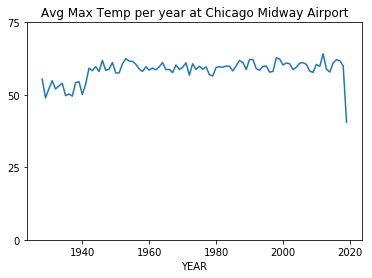

In [13]:
# then let's summarize the average high temps per year
# and plot
df_agg = df.groupby('YEAR')['Temp F'].mean()
df_agg.plot(title='Avg Max Temp per year at Chicago Midway Airport', yticks=[0,25,50,75])

In [11]:
# interesting result...
# looks like something happened with the data gathering process during WWII
# and clearly they don't have a full year's of data for 2019